# **Airline Passenger Satisfaction - EDA & Preprocessing**

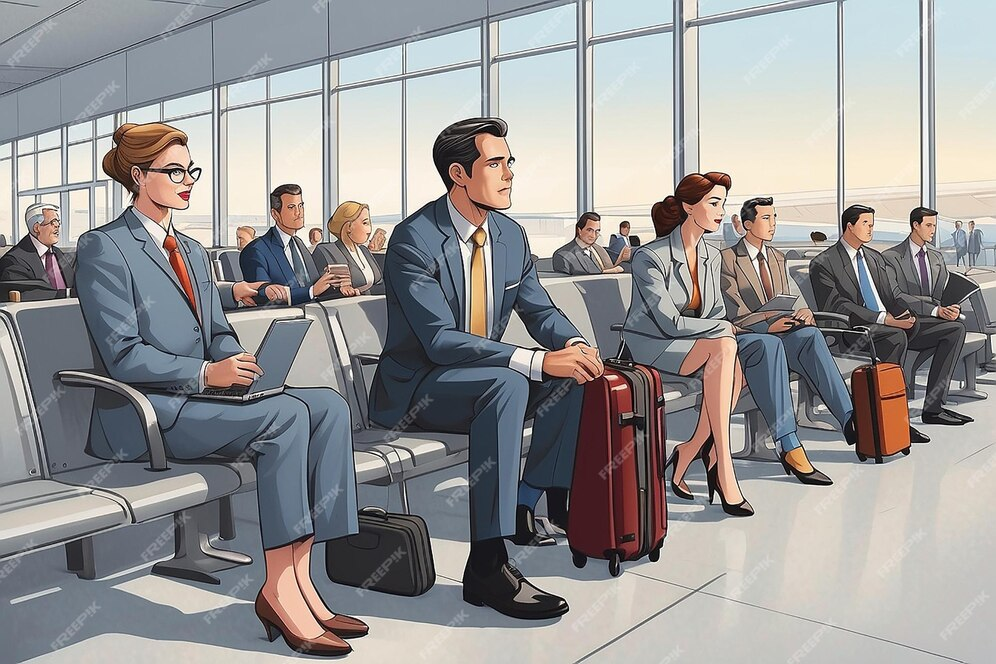

This project is divided into two notebooks for clarity and better organization:

* The **first notebook** focuses on **Exploratory Data Analysis (EDA) and Data Preprocessing**. It includes tasks such as analyzing the dataset, visualizing key patterns, handling missing data, addressing outliers, feature engineering, and preparing the data for model development. By the end of this notebook, the preprocessed data is saved and ready to be used in modeling tasks.

* The **second notebook** covers **Model Development and Evaluation**. This includes building and tuning machine learning models, performing feature selection using SHAP values, and comparing different models. The goal is to select the best model and evaluate its performance on the test set, with the final step being saving the trained model for future use.

These two notebooks work together, ensuring a clear separation between data exploration and model training, making the workflow more structured and easier to follow.

---


The dataset is available [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction), and the variable descriptions are listed below.
- **Gender**: Gender of the passengers (Female, Male)
- **Customer Type**: The customer type (Loyal customer, disloyal customer)
- **Age**: The actual age of the passengers
- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight distance**: The flight distance of this journey
- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking**: Satisfaction level of online booking
- **Gate location**: Satisfaction level of Gate location
- **Food and drink**: Satisfaction level of Food and drink
- **Online boarding**: Satisfaction level of online boarding
- **Seat comfort**: Satisfaction level of Seat comfort
- **Inflight entertainment**: Satisfaction level of inflight entertainment
- **On-board service**: Satisfaction level of On-board service
- **Leg room service**: Satisfaction level of Leg room service
- **Baggage handling**: Satisfaction level of baggage handling
- **Check-in service**: Satisfaction level of Check-in service
- **Inflight service**: Satisfaction level of inflight service
- **Cleanliness**: Satisfaction level of Cleanliness
- **Departure Delay in Minutes**: Minutes delayed when departure
- **Arrival Delay in Minutes**: Minutes delayed when Arrival
- **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Table of Content

1. [Import Libraries and Load Dataset](#section-one)
2. [Helper Functions](#section-two)
  * [Helper Functions for Numeric Analysis](#section-two-one)
  * [Helper Functions for Visualizations](#section-two-two)
  * [Helper Functions for Target Analysis](#section-two-three)
3. [Exploratory Data Analysis (EDA)](#section-three)
  * [Numerical EDA: Summary Statistics](#section-three-one)
    - [Train Data](#section-three-one-one)
    - [Test Data](#section-three-one-two)
    - [Target Variable Analysis](#section-three-one-three)
  * [Visual EDA: Data Visualization](#section-three-two)
4. [Data Preprocessing](#section-four)
  * [Data Cleaning and Reduction](#section-four-one)
  * [Handling Missing Data](#section-four-two)
  * [Outlier Detection and Treatment](#section-four-three)
  * [Feature Engineering](#section-four-four)
  * [Data Scaling and Encoding](#section-five)
5. [Save Preprocessed Data](#section-five)


<a name="section-one"></a>
# **1. Import Libraries and Load Dataset**

In this section, I will import all the necessary Python libraries required for data analysis, preprocessing, and machine learning. After importing the libraries, I will load the dataset, inspect its structure, and understand its key attributes, such as the number of features, data types, and target variables.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_colwidth", None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train_org = pd.read_csv('/content/train.csv')
df_test_org = pd.read_csv('/content/test.csv')

df_train = df_train_org.copy()
df_test = df_test_org.copy()

In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<a name="section-two"></a>
# **2. Helper Functions**

Helper functions streamline repetitive tasks, making the code cleaner and more modular. This section defines custom helper functions that assist in numeric analysis, visualization, and target variable exploration throughout the project.

* **Helper for Numeric Analyzing:**
  - These functions simplify the process of computing and summarizing key statistical metrics for the dataset, helping to identify patterns or anomalies in numeric columns.

* **Helper for Plots:**
  - Custom plotting functions are created to visualize the data more effectively. These helpers will handle various types of plots to better understand the distribution of data, relationships between features, and potential trends.

* **Helper for Target Analysis:**
  - Functions designed specifically for analyzing the target variable(s), focusing on its relationship with other features, helping us understand how features impact the target outcome.

<a name="section-two-one"></a>
### **a. Helper Functions for Numeric Analysis**

In [ ]:
def grab_col_names(dataframe, target_var, cat_th=10, car_th=20, print_results=True):
    cat_cols = [col for col in dataframe.columns
                if dataframe[col].dtype in ["category", "object", "bool"] and col != target_var]

    num_but_cat = [col for col in dataframe.columns
                   if dataframe[col].nunique() < cat_th and dataframe[col].dtype in ["int", "float"] and col != target_var]

    cat_but_car = [col for col in dataframe.columns
                   if dataframe[col].nunique() > car_th and dataframe[col].dtype in ["category", "object"] and col != target_var]

    cat_cols = list(set(cat_cols) - set(cat_but_car)) + num_but_cat
    num_cols = [col for col in dataframe.columns
                if dataframe[col].dtype in ["int", "float"] and col != target_var]
    num_cols = list(set(num_cols) - set(cat_cols))

    if print_results:
        print(f'Observations: {dataframe.shape[0]}')
        print(f'Variables: {dataframe.shape[1]}')
        print(f'Categorical Variables: {len(cat_cols)}')
        print(f'Numeric Variables: {len(num_cols)}')
        print(f'Cardinal Categorical Variables: {len(cat_but_car)}')
        print(f'Target Variable: {target_var}')

    return cat_cols, num_cols, cat_but_car, target_var

In [ ]:
def missing_value(dataframe, include_no_missing=True):
    missing_count = dataframe.isnull().sum()
    value_count = dataframe.shape[0]
    missing_percentage = round(missing_count / value_count * 100, 2)

    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

    if not include_no_missing:
        missing_df = missing_df[missing_df['count'] > 0]

    missing_df = missing_df.sort_values(by='percentage', ascending=False)
    return missing_df

In [ ]:
def get_unique_values(dataframe):
    output_data = []

    for col in dataframe.columns:
        unique_count = dataframe[col].nunique()
        unique_values = dataframe[col].unique() if unique_count <= 10 else "-"
        output_data.append([col, unique_count, unique_values, dataframe[col].dtype])

    output_dataframe = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', 'Unique Values (if ≤ 10)', 'Data Type'])
    return output_dataframe

In [ ]:
def summarize_cat_col(df: pd.DataFrame, cat_cols: list):
    for col in cat_cols:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' does not exist in the DataFrame.")

        value_counts = df[col].value_counts()
        ratio = 100 * value_counts / len(df)

        summary_df = pd.DataFrame({"Count": value_counts,
                                   "Ratio (%)": ratio})

        print(summary_df.to_markdown(numalign="center", stralign="center", tablefmt="grid"))
        print("\n")

In [ ]:
def examine_skewness(dataframe, skew_threshold=0.05, kurt_threshold=3.0):
    skewness = dataframe.skew().sort_values(ascending=False)
    kurtosis = dataframe.kurtosis().sort_values(ascending=False)

    distribution_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

    skew_conditions = [abs(distribution_df['Skewness']) <= skew_threshold,
                       distribution_df['Skewness'] > skew_threshold,
                       distribution_df['Skewness'] < -skew_threshold]
    skew_categories = ['Approximately Normal', 'Right-Skewed', 'Left-Skewed']

    kurt_conditions = [distribution_df['Kurtosis'] <= kurt_threshold,
                       distribution_df['Kurtosis'] > kurt_threshold]
    kurt_categories = ['Low Kurtosis (Flat)', 'High Kurtosis (Peaked)']

    distribution_df['Skew Type'] = np.select(skew_conditions, skew_categories, default='Unknown')
    distribution_df['Kurtosis Type'] = np.select(kurt_conditions, kurt_categories, default='Unknown')

    distribution_df = distribution_df.sort_values(by='Skewness', ascending=False)
    return distribution_df

<a name="section-two-two"></a>
### **b. Helper Functions for Visualizations**

In [ ]:
def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_features = len(df_train.columns)
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(df_train.columns):
        ax = axes[i]
        sns.histplot(df_train[col], kde=True, label='Train', ax=ax)
        sns.histplot(df_test[col], kde=True, label='Test', ax=ax)

        ax.set_title(f'{col} Distribution (Train vs Test)', fontsize=14, fontweight='bold')
        ax.legend()

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle('Comparison of Numerical Feature Distributions: Train vs Test', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_categorical_columns(df_train, df_test, n_cols=2):
    n_features = len(cat_cols)
    n_rows = int(np.ceil(n_features))

    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 5 * n_rows))
    axes = axes.flatten()

    def annotate_bars(ax):
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    for i, col in enumerate(cat_cols):
        ax_train = axes[2 * i]
        sns.countplot(x=df_train[col], hue=df_train[col], ax=ax_train, palette='GnBu_r', legend=False)
        ax_train.set_title(f'{col} (Train)', fontsize=14, fontweight='bold')
        ax_train.set_ylabel('Count')
        annotate_bars(ax_train)

        ax_test = axes[2 * i + 1]
        sns.countplot(x=df_test[col], hue=df_test[col], ax=ax_test, palette='OrRd_r', legend=False)
        ax_test.set_title(f'{col} (Test)', fontsize=14, fontweight='bold')
        ax_test.set_ylabel('Count')
        annotate_bars(ax_test)

    # Hide any extra subplots if not used
    for j in range(2 * n_features, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle('Comparison of Categorical Feature Distributions: Train vs Test', fontsize=18, fontweight='bold', y=1.0)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_heatmaps(df_train, df_test):

    fig, axes = plt.subplots(1, 2, figsize=(30, 15))

    dfs = [df_train, df_test]
    titles = ['Train Dataset Correlation', 'Test Dataset Correlation']

    for ax, df, title in zip(axes, dfs, titles):
        corr_matrix = df.corr()
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        colormap = plt.cm.RdBu_r
        sns.heatmap(corr_matrix, mask=mask, cmap=colormap, annot=True, fmt=".3f",
                    cbar=False, annot_kws={"size": 24, "weight": "bold"}, linewidths=0.5,
                    linecolor='white', square=True, ax=ax,
                    vmin=-1, vmax=1, center=0)

        ax.set_title(title, fontsize=22, fontweight='bold', pad=20)
        ax.tick_params(axis='x', labelsize=18, rotation=45)
        ax.tick_params(axis='y', labelsize=18, rotation=45)

    fig.suptitle('Correlation Matrices: Train vs Test Datasets', fontsize=24, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

<a name="section-two-three"></a>
### **c. Helper Functions for Target Analysis**

In [ ]:
def target_cat_analysis(df: pd.DataFrame, target_col: str, cat_cols: list):
    for col in cat_cols:
        print(f"\n{' '*10} Distribution of {target_col} by {col} {' '*20}")
        crosstab_df = pd.crosstab(df[target_col], df[col])
        print(crosstab_df.to_markdown(index=True, numalign="center", stralign="center", tablefmt="grid") + '\n')

In [ ]:
def target_num_analysis(df: pd.DataFrame, target_col: str, num_cols: list):
    for col in num_cols:
        print(f"\n{' '*10} Descriptive Statistics of {col} by {target_col} {' '*20}")
        agg_df = df.groupby(target_col)[col].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
        print(agg_df.to_markdown(index=False, numalign="center", stralign="center", tablefmt="grid")+"\n")

<a name="section-three"></a>
# **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is the critical step where I explore and summarize the data to gain insights into its structure and relationships. This section is divided into numeric and visual analyses to provide both quantitative and graphical understanding of the dataset.

* **Numerical EDA: Summary Statistics**
  - Train Data: Summary statistics for the training data, including measures such as mean, median, standard deviation, and percentiles, will be computed to understand the distribution and central tendencies of each feature.
  - Test Data: Similar to the training data, I will explore the test data to ensure it follows the same distribution and characteristics as the training set.
  - Target Variable Analysis: A deep dive into the target variable to understand its distribution, class balance, and correlations with other features. This helps in understanding how the target behaves with different variables.
* **Visual EDA: Data Visualization**
  - In this section, I will use visual tools such as histograms, boxplots, and pairplots to visualize the distribution of features, outliers, relationships, and patterns in the dataset, providing more intuitive insights.

In [ ]:
cat_cols, num_cols, cat_but_car, target_col = grab_col_names(df_train, 'satisfaction')

Observations: 103904
Variables: 25
Categorical Variables: 18
Numeric Variables: 6
Cardinal Categorical Variables: 0
Target Variable: satisfaction


<a name="section-three-one"></a>
## **a. Numerical EDA: Summary Statistics**

In statistics, skewness and kurtosis are two ways to measure the shape of a distribution. While skewness tells us about the asymmetry, kurtosis tells us about the tail heaviness or peak sharpness.

* Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.
  * A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
  * A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
  * A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

* Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.
  * The kurtosis of a normal distribution is 3. Mesokurtic distribution (kurtosis = 3, excess kurtosis = 0): perfect normal distribution or very close to it.
  * If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution. Platykurtic distribution (kurtosis < 3, excess kurtosis < 0): flat peak, light tails
  * If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution. Leptokurtic distribution (kurtosis > 3, excess kurtosis > 0): sharp peak, heavy tails



<a name="section-three-one-one"></a>
### **Train Dataframe**

In [ ]:
print(f'Shape     : {df_train.shape}\n'
      f'Size      : {df_train.size}\n'
      f'Dimension : {df_train.ndim}')

Shape     : (103904, 25)
Size      : 2597600
Dimension : 2


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
missing_value(df_train, False)

,count,percentage
Arrival Delay in Minutes,310,0.3


In [ ]:
get_unique_values(df_train)

,Column Name,Number of Unique Values,Unique Values (if ≤ 10),Data Type
0,Unnamed: 0,103904,-,int64
1,id,103904,-,int64
2,Gender,2,"[Male, Female]",object
3,Customer Type,2,"[Loyal Customer, disloyal Customer]",object
4,Age,75,-,int64
5,Type of Travel,2,"[Personal Travel, Business travel]",object
6,Class,3,"[Eco Plus, Business, Eco]",object
7,Flight Distance,3802,-,int64
8,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]",int64
9,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]",int64


In [ ]:
summarize_cat_col(df_train, cat_cols)

+-------------------+---------+-------------+
|   Customer Type   |  Count  |  Ratio (%)  |
+===================+=========+=============+
|  Loyal Customer   |  84923  |   81.7322   |
+-------------------+---------+-------------+
| disloyal Customer |  18981  |   18.2678   |
+-------------------+---------+-------------+


+----------+---------+-------------+
|  Gender  |  Count  |  Ratio (%)  |
+==========+=========+=============+
|  Female  |  52727  |   50.7459   |
+----------+---------+-------------+
|   Male   |  51177  |   49.2541   |
+----------+---------+-------------+


+------------------+---------+-------------+
|  Type of Travel  |  Count  |  Ratio (%)  |
+==================+=========+=============+
| Business travel  |  71655  |   68.9627   |
+------------------+---------+-------------+
| Personal Travel  |  32249  |   31.0373   |
+------------------+---------+-------------+


+----------+---------+-------------+
|  Class   |  Count  |  Ratio (%)  |
+==========+=========+==

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [ ]:
examine_skewness(df_train[num_cols])

,Skewness,Kurtosis,Skew Type,Kurtosis Type
Departure Delay in Minutes,6.733980,100.267006,Right-Skewed,High Kurtosis (Peaked)
Arrival Delay in Minutes,6.596637,94.537006,Right-Skewed,High Kurtosis (Peaked)
Flight Distance,1.109466,0.268535,Right-Skewed,Low Kurtosis (Flat)
id,0.002864,-1.198440,Approximately Normal,Low Kurtosis (Flat)
Unnamed: 0,0.000000,-1.200000,Approximately Normal,Low Kurtosis (Flat)
Age,-0.004516,-0.719568,Approximately Normal,Low Kurtosis (Flat)


In [ ]:
df_train[num_cols].corr().style.background_gradient(cmap='Blues', axis=0)

,Departure Delay in Minutes,Flight Distance,id,Age,Arrival Delay in Minutes,Unnamed: 0
Departure Delay in Minutes,1.000000,0.002158,-0.019546,-0.010152,0.965481,-0.000045
Flight Distance,0.002158,1.000000,0.095544,0.099461,-0.002426,0.002794
id,-0.019546,0.095544,1.000000,0.022857,-0.037254,0.002991
Age,-0.010152,0.099461,0.022857,1.000000,-0.012147,0.004786
Arrival Delay in Minutes,0.965481,-0.002426,-0.037254,-0.012147,1.000000,-0.000045
Unnamed: 0,-0.000045,0.002794,0.002991,0.004786,-0.000045,1.000000


<a name="section-three-one-two"></a>
### **Test Dataframe**

In [ ]:
print(f'Shape     : {df_test.shape}\n'
      f'Size      : {df_test.size}\n'
      f'Dimension : {df_test.ndim}')

Shape     : (25976, 25)
Size      : 649400
Dimension : 2


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
missing_value(df_test, False)

,count,percentage
Arrival Delay in Minutes,83,0.32


In [ ]:
get_unique_values(df_test)

,Column Name,Number of Unique Values,Unique Values (if ≤ 10),Data Type
0,Unnamed: 0,25976,-,int64
1,id,25976,-,int64
2,Gender,2,"[Female, Male]",object
3,Customer Type,2,"[Loyal Customer, disloyal Customer]",object
4,Age,75,-,int64
5,Type of Travel,2,"[Business travel, Personal Travel]",object
6,Class,3,"[Eco, Business, Eco Plus]",object
7,Flight Distance,3281,-,int64
8,Inflight wifi service,6,"[5, 1, 2, 0, 3, 4]",int64
9,Departure/Arrival time convenient,6,"[4, 1, 0, 3, 5, 2]",int64


In [ ]:
summarize_cat_col(df_test, cat_cols)

+-------------------+---------+-------------+
|   Customer Type   |  Count  |  Ratio (%)  |
+===================+=========+=============+
|  Loyal Customer   |  21177  |   81.5253   |
+-------------------+---------+-------------+
| disloyal Customer |  4799   |   18.4747   |
+-------------------+---------+-------------+


+----------+---------+-------------+
|  Gender  |  Count  |  Ratio (%)  |
+==========+=========+=============+
|  Female  |  13172  |   50.7083   |
+----------+---------+-------------+
|   Male   |  12804  |   49.2917   |
+----------+---------+-------------+


+------------------+---------+-------------+
|  Type of Travel  |  Count  |  Ratio (%)  |
+==================+=========+=============+
| Business travel  |  18038  |   69.441    |
+------------------+---------+-------------+
| Personal Travel  |  7938   |   30.559    |
+------------------+---------+-------------+


+----------+---------+-------------+
|  Class   |  Count  |  Ratio (%)  |
+==========+=========+==

In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25976.0,12987.500000,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,65005.657992,37611.526647,17.0,32170.50,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.00,40.0,51.00,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.00,849.0,1744.00,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.00,3.0,4.00,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.00,3.0,4.00,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.00,3.0,4.00,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.00,4.0,4.00,5.0


In [ ]:
examine_skewness(df_test[num_cols])

,Skewness,Kurtosis,Skew Type,Kurtosis Type
Departure Delay in Minutes,7.193970,102.183081,Right-Skewed,High Kurtosis (Peaked)
Arrival Delay in Minutes,6.984497,97.454863,Right-Skewed,High Kurtosis (Peaked)
Flight Distance,1.102927,0.253731,Right-Skewed,Low Kurtosis (Flat)
Unnamed: 0,0.000000,-1.200000,Approximately Normal,Low Kurtosis (Flat)
Age,-0.000088,-0.717877,Approximately Normal,Low Kurtosis (Flat)
id,-0.011364,-1.206142,Approximately Normal,Low Kurtosis (Flat)


In [ ]:
df_test[num_cols].corr().style.background_gradient(cmap='Blues', axis=0)

,Departure Delay in Minutes,Flight Distance,id,Age,Arrival Delay in Minutes,Unnamed: 0
Departure Delay in Minutes,1.000000,0.003446,-0.009884,-0.004334,0.964502,-0.005948
Flight Distance,0.003446,1.000000,0.095335,0.099409,0.000131,-0.002470
id,-0.009884,0.095335,1.000000,0.010211,-0.029090,0.006946
Age,-0.004334,0.099409,0.010211,1.000000,-0.007400,-0.007964
Arrival Delay in Minutes,0.964502,0.000131,-0.029090,-0.007400,1.000000,-0.002974
Unnamed: 0,-0.005948,-0.002470,0.006946,-0.007964,-0.002974,1.000000


<a name="section-three-one-three"></a>
### **Target Variable Analysis**

In [ ]:
target_cat_analysis(df_train, target_col, cat_cols)


           Distribution of satisfaction by Customer Type                     
+-------------------------+------------------+---------------------+
|      satisfaction       |  Loyal Customer  |  disloyal Customer  |
+=========================+==================+=====================+
| neutral or dissatisfied |      44390       |        14489        |
+-------------------------+------------------+---------------------+
|        satisfied        |      40533       |        4492         |
+-------------------------+------------------+---------------------+


           Distribution of satisfaction by Gender                     
+-------------------------+----------+--------+
|      satisfaction       |  Female  |  Male  |
+=========================+==========+========+
| neutral or dissatisfied |  30193   | 28686  |
+-------------------------+----------+--------+
|        satisfied        |  22534   | 22491  |
+-------------------------+----------+--------+


           Distribution of 

In [ ]:
target_num_analysis(df_train, target_col, num_cols)


           Descriptive Statistics of Departure Delay in Minutes by satisfaction                     
+-------------------------+---------+----------+---------+-------+-------+
|      satisfaction       |  mean   |  median  |   std   |  min  |  max  |
+=========================+=========+==========+=========+=======+=======+
| neutral or dissatisfied | 16.5037 |    0     | 40.1919 |   0   | 1592  |
+-------------------------+---------+----------+---------+-------+-------+
|        satisfied        | 12.6081 |    0     | 35.3826 |   0   | 1305  |
+-------------------------+---------+----------+---------+-------+-------+


           Descriptive Statistics of Flight Distance by satisfaction                     
+-------------------------+---------+----------+---------+-------+-------+
|      satisfaction       |  mean   |  median  |   std   |  min  |  max  |
+=========================+=========+==========+=========+=======+=======+
| neutral or dissatisfied | 928.92  |   671    | 790.452

In [ ]:
df_train_corr = df_train.copy()
df_train_corr["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace=True)
df_train_corr[num_cols+[target_col]].corr()[target_col]

,satisfaction
Departure Delay in Minutes,-0.050494
Flight Distance,0.298780
id,0.013734
Age,0.137167
Arrival Delay in Minutes,-0.057582
Unnamed: 0,-0.004731
satisfaction,1.000000


### **Insights of Numerical EDA**

* The training dataframe has 103,904 rows, and the test dataframe has 25,976 rows. Both have 25 variables (the test data also includes the target variable).
  - Of these variables, 1 is of type "float," 5 are "object," and 19 are "int."
* Neither dataset contains any duplicate data.
* The test and train data only have missing values in the 'Arrival Delay in Minutes' column: 83 in the test set and 310 in the train set, respectively.
* The unique values in the columns of both datasets appear to be appropriate.
* In both the train and test datasets, 'Arrival Delay in Minutes,' 'Departure Delay in Minutes,' and 'Flight Distance' are right-skewed, while 'Age' appears to be approximately normally distributed.
* Some insights obtained from the descriptive analysis are as follows:
  - "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Age" might have outliers.
  - "Departure Delay in Minutes" and "Arrival Delay in Minutes" have high standard deviations compared to their means, suggesting a highly skewed distribution with most values around 0 and some extreme delays.
* The "Unnamed: 0" and "id" columns will be dropped in the subsequent steps.
* In both the train and test data, 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' show an almost perfect positive correlation.

<a name="section-three-two"></a>
## **b.  Visual EDA: Data Visualization**

In [ ]:
num_cols.remove('Unnamed: 0')
num_cols.remove('id')

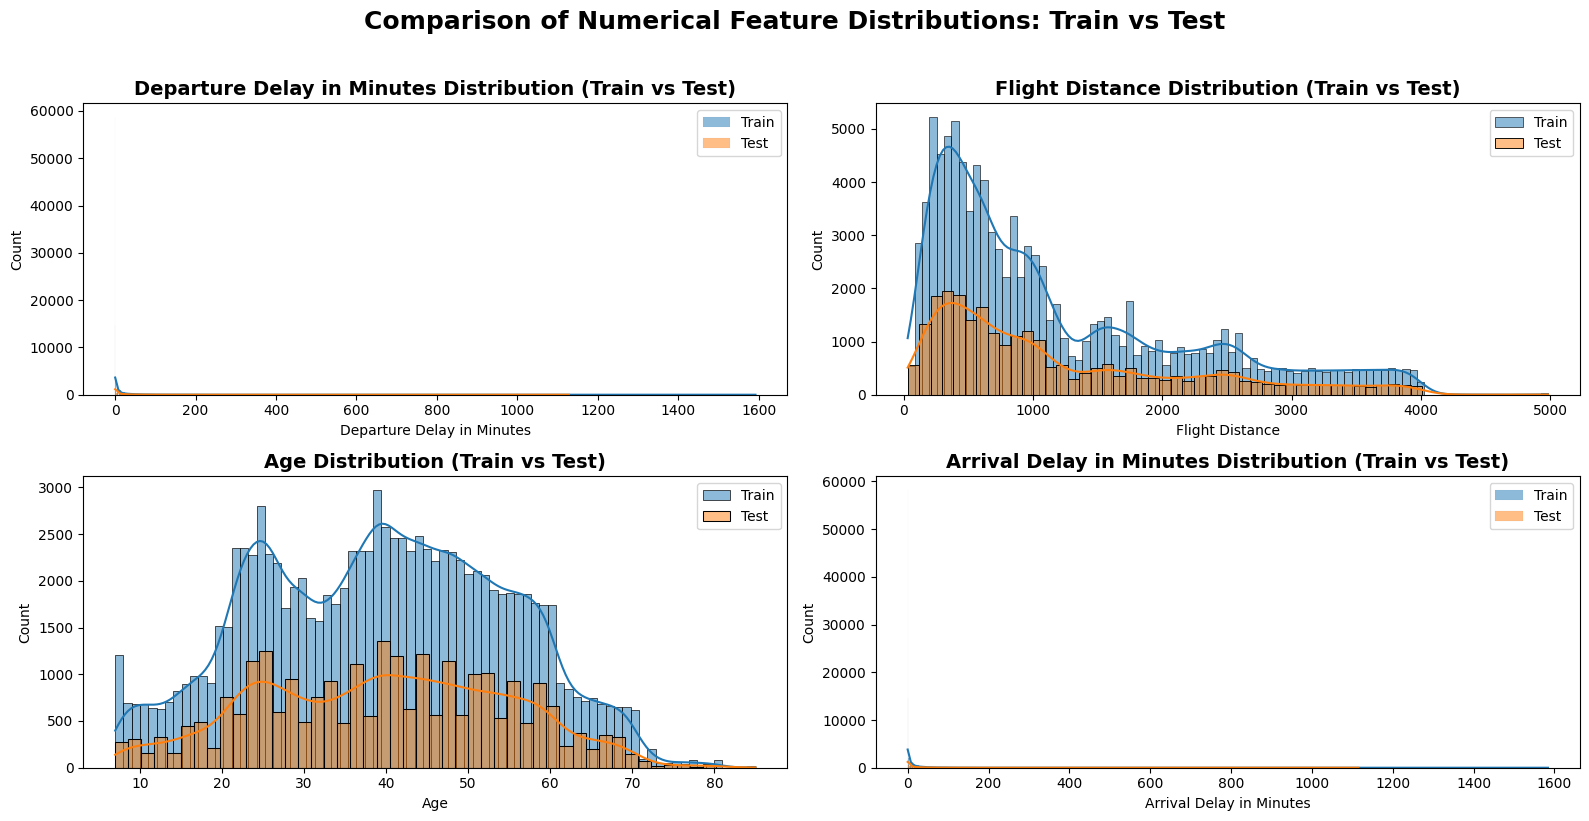

In [ ]:
plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=2)

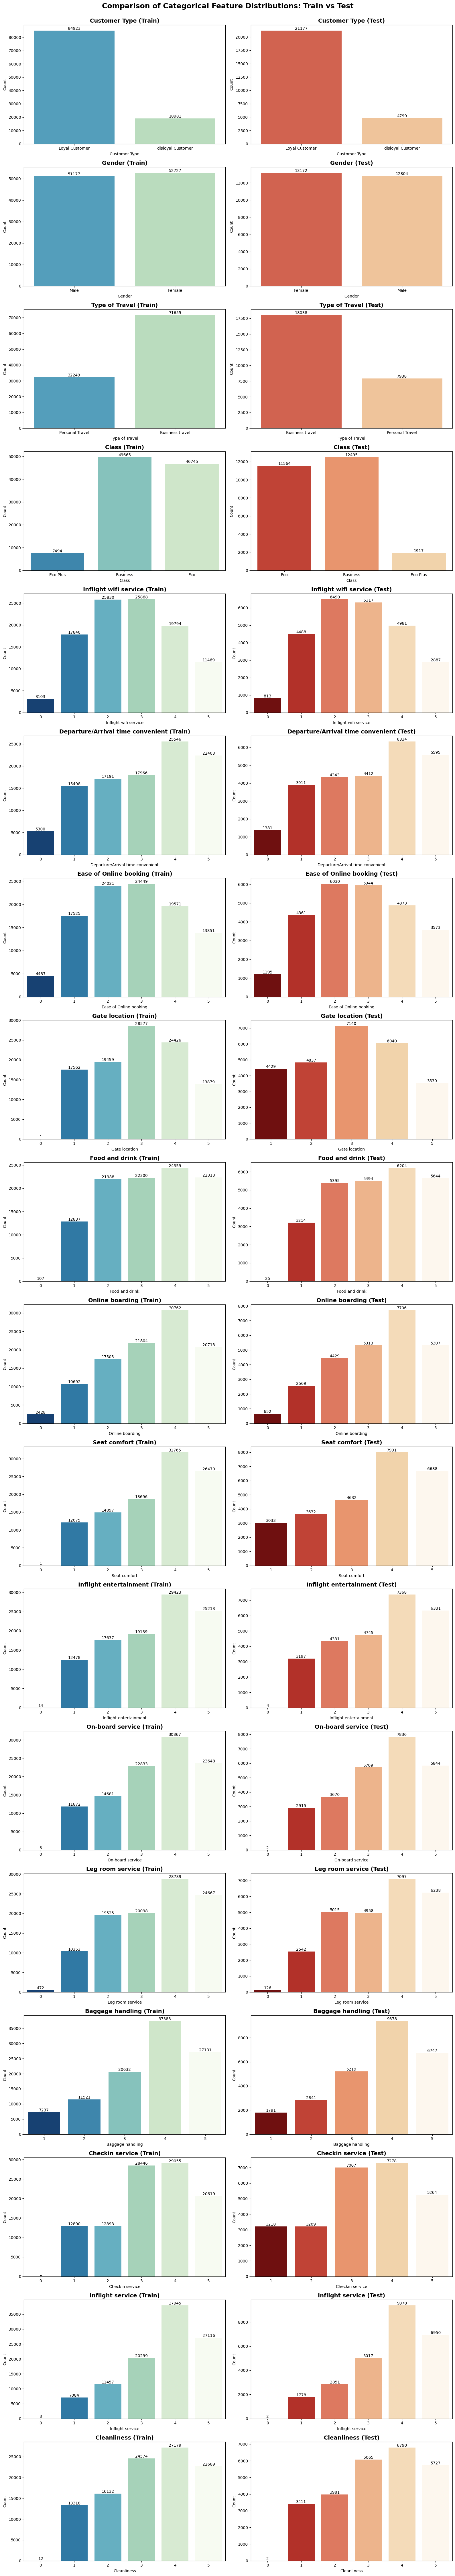

In [ ]:
plot_categorical_columns(df_train[cat_cols], df_test[cat_cols], n_cols=2)

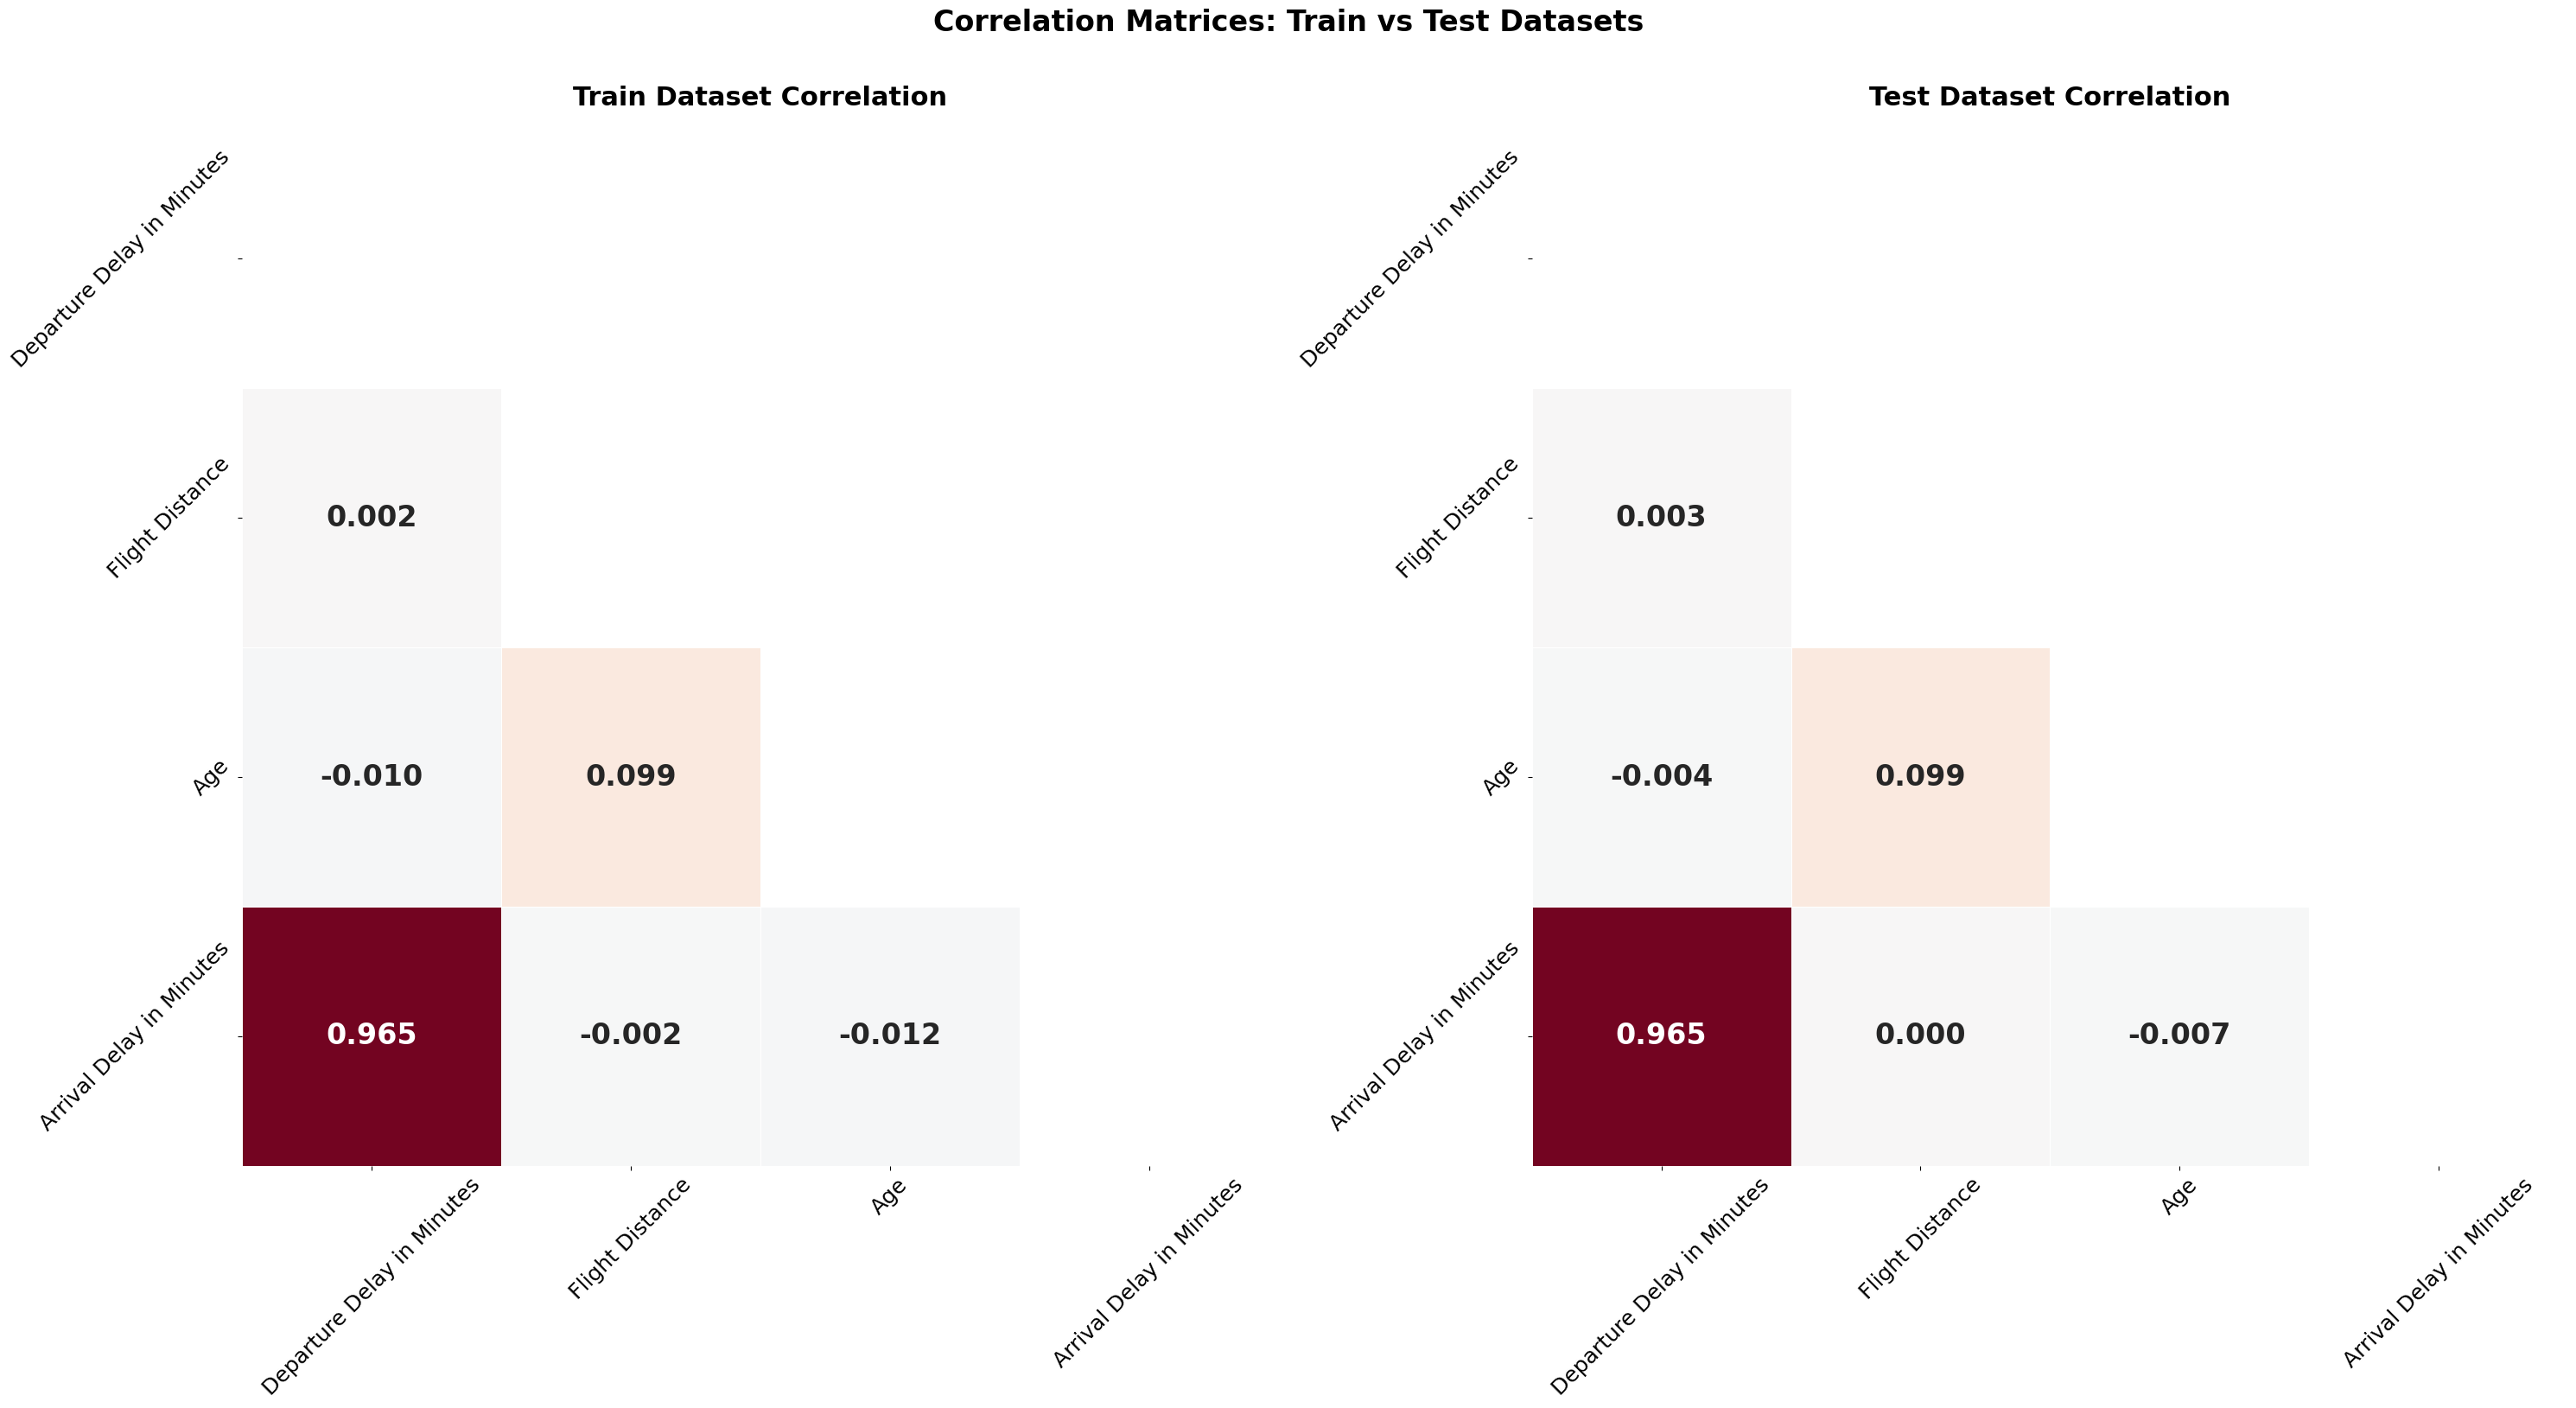

In [ ]:
plot_heatmaps(df_train[num_cols], df_test[num_cols])

In [ ]:
sns.pairplot(data=df_train[num_cols+[target_col]], hue=target_col);

In [ ]:
sns.pairplot(data=df_test[num_cols+[target_col]], hue=target_col, hue_order=['neutral or dissatisfied', 'satisfied']);

### **Insights of Visual EDA**

* The histograms once again show that 'Arrival Delay in Minutes,' 'Departure Delay in Minutes,' and 'Flight Distance' are right-skewed, while 'Age' is approximately normally distributed.
  - Due to the high frequency of zero-minute delays in both 'Arrival Delay in Minutes' (58,159) and 'Departure Delay in Minutes' (58,668), the histograms are quite skewed and appear small because of the large values on the y-axis.
* According to the count plots analyzing the categorical columns:
  - Most customers of the company fly with Business class (49,665), followed by Economy (46,745) and Economy Plus (7,494).
  - Nearly equal numbers of male (51,177) and female (52,727) customers fly with the company.
  - The remaining categorical columns, which rate the company's service on a scale of 0 to 5, received high ratings. Customers are generally quite satisfied with the company's service
* Both the heatmaps and pair plots confirm that, in both the train and test data, 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' exhibit an almost perfect positive correlation."

<a name="section-four"></a>
# **4. Data Preprocessing**

Preprocessing prepares the data for machine learning by cleaning, transforming, and scaling the data. This section will address common data issues, apply feature engineering, and ensure that the dataset is ready for modeling.

* **Data Cleaning and Reduction:**
  - This step focuses on removing redundant or unnecessary features and addressing inconsistencies in the data. It ensures that the dataset is compact and only contains relevant information.

* **Handling Missing Data:**
  - In this part, I will deal with any missing values in the dataset, determining the most appropriate imputation methods based on the nature of the missing data and its potential impact on the analysis.

* **Outlier Detection and Treatment:**
  - Outliers can distort the performance of machine learning models. Here, I will detect and handle outliers using statistical methods to improve the model's reliability.

* **Feature Engineering:**
  - This section focuses on creating new features or modifying existing ones to capture important patterns in the data. This step enhances the dataset's ability to train better-performing models.

* **Data Scaling and Encoding:**
  - I will apply scaling techniques to numerical features to standardize them, and encoding methods (such as one-hot encoding) for categorical variables to make the data machine-readable.

<a name="section-four-one"></a>
### **a. Data Cleaning and Reduction**

In [ ]:
df_train.drop(columns=['Unnamed: 0', 'id', 'Arrival Delay in Minutes'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'id', 'Arrival Delay in Minutes'], inplace=True)

cat_cols, num_cols, cat_but_car, target_col = grab_col_names(df_train, 'satisfaction', print_results=False)

<a name="section-four-two"></a>
### **b. Handling Missing Data**

In [ ]:
def knn_impute(train_df: pd.DataFrame, test_df: pd.DataFrame, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)

    print(f"Imputing missing values for training data...")
    train_imputed_values = imputer.fit_transform(train_df[num_cols])

    print(f"Imputing missing values for test data...")
    test_imputed_values = imputer.transform(test_df[num_cols])

    train_df[num_cols] = train_imputed_values
    test_df[num_cols] = test_imputed_values

    print("KNN imputation completed successfully.")
    return train_df, test_df

train_imputed, test_imputed = knn_impute(df_train, df_test)

Imputing missing values for training data...
Imputing missing values for test data...
KNN imputation completed successfully.


<a name="section-four-three"></a>
### **c. Outlier Detection and Treatment**

In [ ]:
def calculate_outlier_thresholds(dataframe, variable, method, low_quantile=0.10, up_quantile=0.90):
    if method == 'iqr':
        quantile_one = dataframe[variable].quantile(low_quantile)
        quantile_three = dataframe[variable].quantile(up_quantile)
        interquantile_range = quantile_three - quantile_one
        low_limit = quantile_one - 1.5 * interquantile_range
        up_limit = quantile_three + 1.5 * interquantile_range
    elif method == 'z_score':
        mean = dataframe[variable].mean()
        std_dev = dataframe[variable].std()
        low_limit = mean - 3 * std_dev
        up_limit = mean + 3 * std_dev
    else:
        raise ValueError("Method must be either 'iqr' or 'z_score'.")

    return low_limit, up_limit


def identify_outliers(dataframe, col_name, method):
    low_limit, up_limit = calculate_outlier_thresholds(dataframe, col_name, method)
    outliers = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    return outliers


def replace_outliers(dataframe, variable, method, plot=False):
    dataframe_copy = dataframe.copy()
    low_limit, up_limit = calculate_outlier_thresholds(dataframe, variable, method)

    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

    num_outliers_replaced = identify_outliers(dataframe_copy, variable, method).sum()
    print(f"Replaced {num_outliers_replaced} outliers in '{variable}' using {method.upper()} method.")

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(15, 4))
        sns.histplot(dataframe_copy[variable], ax=axes[0], kde=True)
        sns.histplot(dataframe[variable], ax=axes[1], kde=True)
        axes[0].set_title(f"{variable} Before Outlier Replacement", fontsize=13)
        axes[1].set_title(f"{variable} After Outlier Replacement", fontsize=13)
        plt.tight_layout()
        plt.show()


# for col in num_cols:
#    print(col, replace_outliers(df_train, col, method='iqr', plot=True))

<a name="section-four-four"></a>
### **d. Feature Engineering**

In [ ]:
def categorize_features(df_train, df_test):

    age_bins = [0, 12, 19, 35, 50, 65, 100]
    age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

    distance_bins = [0, 1500, 3500, float('inf')]
    distance_labels = ['Short Haul', 'Medium Haul', 'Long Haul']

    delay_bins = [-float('inf'), 0, 30, 60, 120, float('inf')]
    delay_labels = ['On Time', 'Slightly Delayed', 'Moderately Delayed', 'Heavily Delayed', 'Severely Delayed']

    for dataframe in [df_train, df_test]:
        dataframe['age_cat'] = pd.cut(dataframe['Age'], bins=age_bins, labels=age_labels)
        dataframe['flight_distance_cat'] = pd.cut(dataframe['Flight Distance'], bins=distance_bins, labels=distance_labels)
        dataframe['departure_delay_cat'] = pd.cut(dataframe['Departure Delay in Minutes'], bins=delay_bins, labels=delay_labels)
        # dataframe['arrival_delay_cat'] = pd.cut(dataframe['Arrival Delay in Minutes'], bins=delay_bins, labels=delay_labels)

    return df_train, df_test


df_train, df_test = categorize_features(df_train, df_test)

In [ ]:
cat_cols, num_cols, cat_but_car, target_col = grab_col_names(df_train, 'satisfaction', print_results=False)
summarize_cat_col(df_train, [col for col in cat_cols if "_cat" in col])

+-----------------------+---------+-------------+
|  departure_delay_cat  |  Count  |  Ratio (%)  |
+=======================+=========+=============+
|        On Time        |  58668  |   56.4637   |
+-----------------------+---------+-------------+
|   Slightly Delayed    |  30707  |   29.5532   |
+-----------------------+---------+-------------+
|  Moderately Delayed   |  7290   |   7.01609   |
+-----------------------+---------+-------------+
|    Heavily Delayed    |  4699   |   4.52244   |
+-----------------------+---------+-------------+
|   Severely Delayed    |  2540   |   2.44456   |
+-----------------------+---------+-------------+


+-------------+---------+-------------+
|   age_cat   |  Count  |  Ratio (%)  |
+=============+=========+=============+
|    Adult    |  35698  |   34.3567   |
+-------------+---------+-------------+
| Young Adult |  31648  |   30.4589   |
+-------------+---------+-------------+
| Middle Aged |  22739  |   21.8846   |
+-------------+---------+---

<a name="section-four-five"></a>
### **e. Data Scaling and Encoding**

In [ ]:
def scale_columns(df, num_cols, scaler):
    df_copy = df.copy()
    if num_cols:
        df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])
    return df_copy


def encode_columns(df, cat_cols, encoding_method):
    df_copy = df.copy()
    if encoding_method == 'onehot':
        return pd.get_dummies(df_copy, columns=cat_cols, drop_first=True)
    elif encoding_method == 'label':
        label_encoders = {}
        for col in cat_cols:
            le = LabelEncoder()
            df_copy[col] = le.fit_transform(df_copy[col])
            label_encoders[col] = le
        return df_copy
    else:
        raise ValueError(f"Unknown encoding method: {encoding_method}")


def handle_target_column(df, target_col, encoding_method, scaler=None):
    df_copy = df.copy()
    if target_col is not None:
        if df_copy[target_col].dtype == 'object':
            if encoding_method == 'onehot':
                target_encoded = pd.get_dummies(df_copy[target_col], drop_first=True)
                df_copy = df_copy.drop(target_col, axis=1).join(target_encoded)
            elif encoding_method == 'label':
                le = LabelEncoder()
                df_copy[target_col] = le.fit_transform(df_copy[target_col])
        elif df_copy[target_col].dtype in ['int64', 'float64'] and scaler:
            df_copy[target_col] = scaler.fit_transform(df_copy[[target_col]])
        else:
            raise ValueError(f"Unsupported target column type for encoding/scaling: {df_copy[target_col].dtype}")
    return df_copy


def scale_and_encode(df, num_cols, cat_cols, target_col=None, scaling_method='standard', encoding_method='onehot'):
    df_copy = df.copy()

    if scaling_method == 'standard':
        scaler = StandardScaler()
    elif scaling_method == 'minmax':
        scaler = MinMaxScaler()
    elif scaling_method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError(f"Unknown scaling method: {scaling_method}")

    df_copy = scale_columns(df_copy, num_cols, scaler)
    df_copy = encode_columns(df_copy, cat_cols, encoding_method)
    df_copy = handle_target_column(df_copy, target_col, encoding_method, scaler)
    return df_copy


df_train_scaled_encoded = scale_and_encode(df_train, num_cols, cat_cols, target_col, 'standard', 'label')
df_test_scaled_encoded = scale_and_encode(df_test, num_cols, cat_cols, target_col, 'standard', 'label')

<a name="section-five"></a>
# **5. Save Preprocessed Data**

After completing the preprocessing steps, the cleaned and transformed dataset will be saved to a CSV file. This allows us to use the preprocessed data directly in the modeling phase without needing to repeat the preprocessing steps, ensuring consistency in future work.

In [ ]:
df_train_scaled_encoded.to_csv('train_preprocessed.csv', index=False)
df_test_scaled_encoded.to_csv('test_preprocessed.csv', index=False)